# Analysis and Data Visualization on Austin Listings.

**Introduction:**
     
Airbnb is a popular online marketplace allowing property owners to rent their homes, apartments, or rooms to travelers seeking short-term accommodation.
In Austin, Texas, Airbnb has become an increasingly popular option for tourists and business travelers seeking affordable and unique lodging options. 
    Airbnb has had a significant impact on the tourism industry in Austin, providing travelers with an alternative to traditional hotel accommodations and allowing them to experience the city like a local. 

**In this report, we will explore the impact of Airbnb in Austin. We will examine the growth of Airbnb in the city, the distribution of listings, and the relationship between Airbnb and traditional hotels**     
     
**Data Source:** 
    
The Austin_listings dataset is a valuable resource for researchers, hosts, and guests interested in Austin's short-term rental market.

* **The Dataset is taken from <a href="http://insideairbnb.com/get-the-data/" target="_blank">Airbnb Data</a>**

* **Link to the dataset https://docs.google.com/spreadsheets/d/1SaA_Uv5u07uhTHmV1lVacSPHwDLyD5q4nOBYfwQa8JQ/edit#gid=2019101633**

**Data Description:**

* The dataset contains 
    * over 10,000 rows and 74 columns of data,
    * includes property type, room type, price, neighborhood, availability, and review scores.
    * Geospatial data such as latitude and longitude makes it possible to visualize the listings on a map.
    *The data contains number, float, date, and categorical variables.

In [203]:
#Importing the packages required for visualization

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
import warnings #Require this package for Scatter Plot Warnings
warnings.filterwarnings('ignore')

In [110]:
#Reading of the data from their datasets

listing_data = pd.read_csv("Austin_listings.csv")
listing_data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5.456000e+03,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.260570,-97.734410,Entire home/apt,176,2,630,3/2/23,3.69,2,298,45,NaN
1,5.769000e+03,NW Austin Room,8186,Elizabeth,78729,30.456970,-97.784220,Private room,42,1,275,1/30/23,1.75,1,0,11,NaN
2,6.413000e+03,Gem of a Studio near Downtown,13879,Todd,78704,30.248850,-97.735870,Entire home/apt,109,30,122,10/17/22,0.76,1,0,5,NaN
3,6.448000e+03,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,78704,30.260340,-97.764870,Entire home/apt,240,3,295,3/9/23,2.10,1,133,27,NaN
4,8.502000e+03,Woodland Studio Lodging,25298,Karen,78741,30.234660,-97.736820,Entire home/apt,85,4,48,11/13/21,0.30,1,36,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,8.470000e+17,Central Austin Bungalow!,276920863,Susana,78705,30.289220,-97.747269,Entire home/apt,129,2,0,NaN,NaN,41,129,0,NaN
14364,8.470000e+17,Fresh Austin Studio Apartment!,276920863,Susana,78705,30.290238,-97.748501,Entire home/apt,54,2,0,NaN,NaN,41,131,0,NaN
14365,8.470000e+17,Quaint Austin Condo!,276920863,Susana,78705,30.287227,-97.726643,Entire home/apt,145,2,0,NaN,NaN,41,37,0,NaN
14366,8.470000e+17,NEW! Aqua Azul Outdoors - Near Lake Travis,499116561,Edwin,78734,30.381710,-97.952860,Entire home/apt,144,2,0,NaN,NaN,1,265,0,NaN


In [111]:
#Information about the attributes and their Data types

listing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14368 entries, 0 to 14367
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14368 non-null  float64
 1   name                            14368 non-null  object 
 2   host_id                         14368 non-null  int64  
 3   host_name                       14366 non-null  object 
 4   neighbourhood                   14368 non-null  int64  
 5   latitude                        14368 non-null  float64
 6   longitude                       14368 non-null  float64
 7   room_type                       14368 non-null  object 
 8   price                           14368 non-null  int64  
 9   minimum_nights                  14368 non-null  int64  
 10  number_of_reviews               14368 non-null  int64  
 11  last_review                     11337 non-null  object 
 12  reviews_per_month               

In [112]:
#Calculation of the percentage of null values before cleaning.

(listing_data.isnull().sum().sum()/(listing_data.size)*100)

8.36499410454605

**Hence the data has 8.364% of missing values**

In [113]:
# Checking for missing values

missing_values = listing_data.isnull().sum()
print(missing_values)

id                                    0
name                                  0
host_id                               0
host_name                             2
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3031
reviews_per_month                  3031
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           14368
dtype: int64


**As we can see there are missing values in the data which has to be removed**

# Data Cleaning

To clean the Data, we can do the following:

1) Replace **Mode** is used to fill the **categorical data**

2) Replace **Median** is used to fill the **numerical data**

3) Drop the rows of the column having 0.1% missing values.

4) Fill the column with no data as **Unknown**.

5) Conversion of the datatypes such as **Date** formats.

6) Removing of the **duplicate** rows 

7) Renaming of the columns

8) Removing of the **outliers** , so that the graph doesnt show a stretch

**Challenges:**

Since the dataset is prior to 2022, imputing the median of the entire column would result in false visualizations.

In [114]:
#Replace missing values with Median to fill the **numerical data**

listing_data['reviews_per_month'].fillna(listing_data['reviews_per_month'].median(), inplace=True)

In [115]:
missing_values = listing_data.isnull().sum()
print(missing_values)

id                                    0
name                                  0
host_id                               0
host_name                             2
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3031
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           14368
dtype: int64


In [116]:
# Drop rows with 0.1% missing values in important columns

important_cols = ['host_name']
listing_data.dropna(subset=important_cols, inplace=True)

In [117]:
missing_values = listing_data.isnull().sum()
print(missing_values)

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3031
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           14366
dtype: int64


In [118]:
#Calculating mode value and replacing missing value for 'last_reviews' column with the calculate mode.

listing_data = listing_data.fillna(listing_data.mode().iloc[0])

In [119]:
missing_values = listing_data.isnull().sum()
print(missing_values)

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           14366
dtype: int64


In [78]:
#Replacing License with 'unknown' for future updation of data.

listing_data = listing_data.fillna("Unknown")

In [120]:
missing_values = listing_data.isnull().sum()
print(missing_values)

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           14366
dtype: int64


**Hence we reached zero missing values.**

In [122]:
(listing_data.isnull().sum().sum()/(listing_data.size)*100)

5.88235294117647

***Few more steps to be perfomred as part of Data Cleaning***

In [123]:
# Convert date columns to datetime format

listing_data["last_review"] = pd.to_datetime(listing_data["last_review"])

In [124]:
# Check for duplicate rows and drop them

print(listing_data.duplicated().sum())
listing_data.drop_duplicates(inplace=True)

35


In [125]:
# Renaming the column name to name desired for the Visualization.

listing_data.rename(columns={"neighbourhood": "neighborhood"}, inplace=True)

**Checking the outliers in price column. So that there is no clumsiness gets created while we are visualizing the data.**

In [126]:
# Check for outliers in price column

q1 = listing_data["price"].quantile(0.25)
q3 = listing_data["price"].quantile(0.75)
iqr = q3 - q1
listing_data = listing_data[(listing_data["price"] >= (q1 - 1.5 * iqr)) & (listing_data["price"] <= (q3 + 1.5 * iqr))]

# Visualizations:
   
   ## a) Bar Graph :
   Bar graphs are useful for visualizing the **distribution of categorical data** because they provide a clear and concise   
   representation of the data. They allow us to easily compare the number of listings in different categories and identify any 
   trends or patterns in the data.
    Overall, a bar graph is an effective way to visualize the distribution of categorical variables in the Austin Listing 
    dataset and can be used to gain insights into the characteristics of short-term rentals in Austin.
      
   **Insights**
   * Count of number of Listings as per Room Type at Austin. 
   * Count of number of Listings as per Nighborhood at Austin. 
   * Bar graph represents the data in 2D format by using the X and Y axis and bars. 
   * The size of the bar will represent the size of the listings. 


 **We have written a function which takes various parameters such as Type, xlabel, ylabel, title and have sent in various data columns to create various bar graphs.**

room_type
neighborhood
calculated_host_listings_count


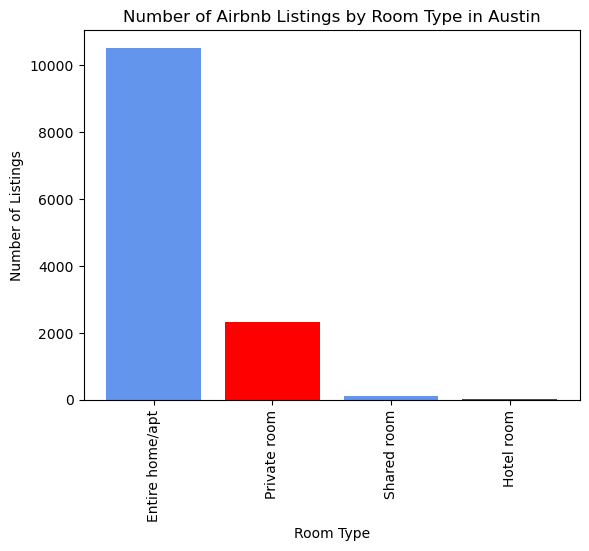

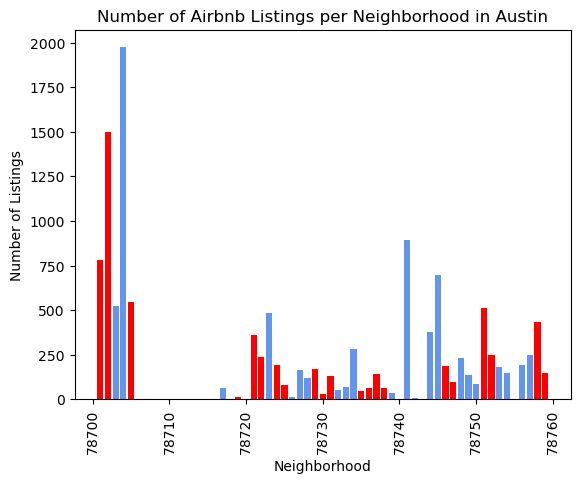

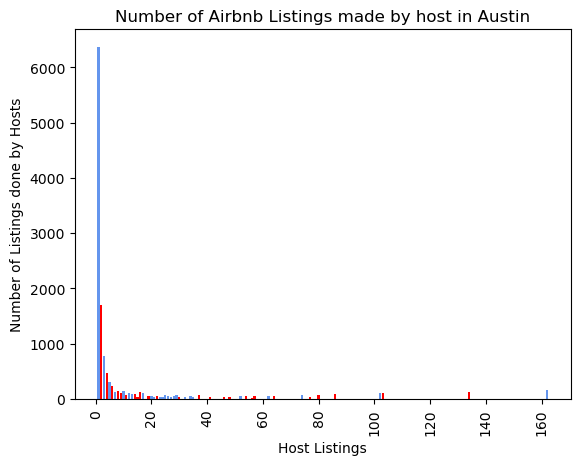

In [127]:
def bar_Graph():
    # Count the number of listings per property type
    countList = [
                 {'type':'room_type', 'xlabel': 'Room Type', 'ylabel': 'Number of Listings', 'title': 'Number of Airbnb Listings by Room Type in Austin' },
                 {'type':'neighborhood', 'xlabel': 'Neighborhood', 'ylabel': 'Number of Listings', 'title': 'Number of Airbnb Listings per Neighborhood in Austin' },
                 {'type':'calculated_host_listings_count', 'xlabel': 'Host Listings', 'ylabel': 'Number of Listings done by Hosts', 'title': 'Number of Airbnb Listings made by host in Austin' },
                ]
    for listType in countList:
        print(listType['type'])

    for listType in countList:
        property_type_counts = listing_data[listType['type']].value_counts()
        # Create a bar chart of the property type counts
        plt.bar(property_type_counts.index, property_type_counts.values, color = ['cornflowerblue', 'red'])
        plt.xticks(rotation=90)
        plt.xlabel(listType['xlabel'])
        plt.ylabel(listType['ylabel'])
        plt.title(listType['title'])
        plt.show()
bar_Graph()

 **We have used a concept of subplots to create multiple charts in the form of a grid for a better comparision.**

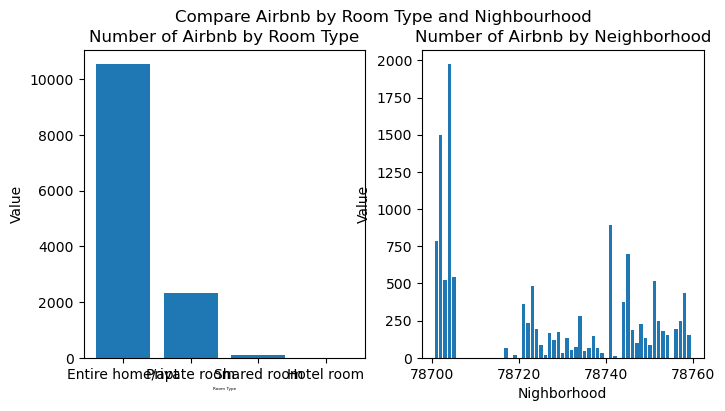

In [128]:
# create a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# plot the bar graphs on the subplots
property_type_counts = listing_data['room_type'].value_counts()
axs[0].bar(property_type_counts.index, property_type_counts.values)
axs[0].set_title('Number of Airbnb by Room Type')
axs[0].set_xlabel('Room Type', fontsize=3)
axs[0].set_ylabel('Value')

neighborhood_type_counts = listing_data['neighborhood'].value_counts()
axs[1].bar(neighborhood_type_counts.index, neighborhood_type_counts.values)
axs[1].set_title('Number of Airbnb by Neighborhood')
axs[1].set_xlabel('Nighborhood')
axs[1].set_ylabel('Value')

# add a title to the overall plot
fig.suptitle('Compare Airbnb by Room Type and Nighbourhood')

# show the plot
plt.show()


## b) Histogram:
* A histogram is a graphical representation of the distribution of numerical data. In the context of the Austin listings dataset, a histogram can be used to visualize the distribution of a numerical variable, such as price or review scores.
    
**Insights:**
* The histogram can be used to identify the most common price range for listings in Austin, as well as the range of prices that are less common.
* Here in our visualization of histogram we are using price frequency for the listings.
* We can know how many lisitngs have agreed for which pricing. 

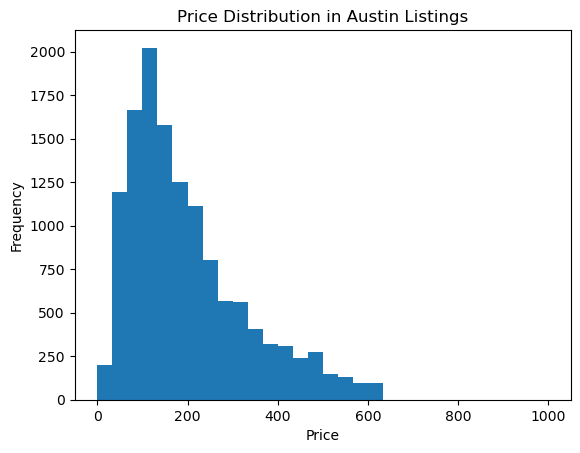

In [129]:
# Create a histogram of the price distribution
plt.hist(listing_data['price'], bins=30, range=(0, 1000))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution in Austin Listings')
plt.show()


## c) Line Graph:
      
* A line graph is a type of chart that displays data as a series of points connected by straight lines. In the context of the Austin listings dataset, a line graph can be used to visualize changes in a numerical variable over time or another continuous dimension.

**Insights**
* Line graph in our dataset is to show the trend in the number of listings over time.
* The x-axis could represent the years or months, while the y-axis represents the number of listings.
* The line graph can show how the number of listings changes over time, which can provide insights into the growth or decline of the Airbnb market in Austin.
* To acheive this we will need to convert the Date object to the format specified by Python
* We can see that after the year 2021 there is only raise in the graph.


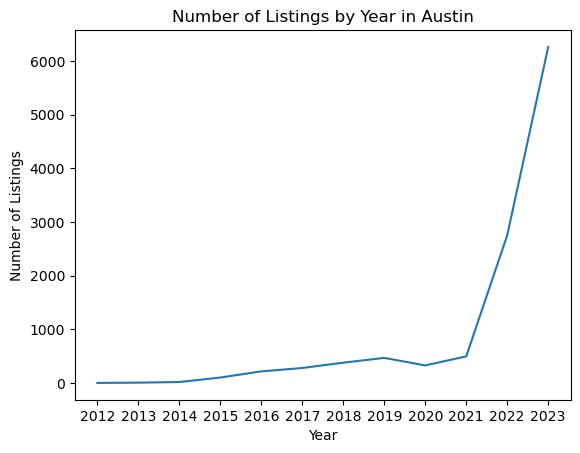

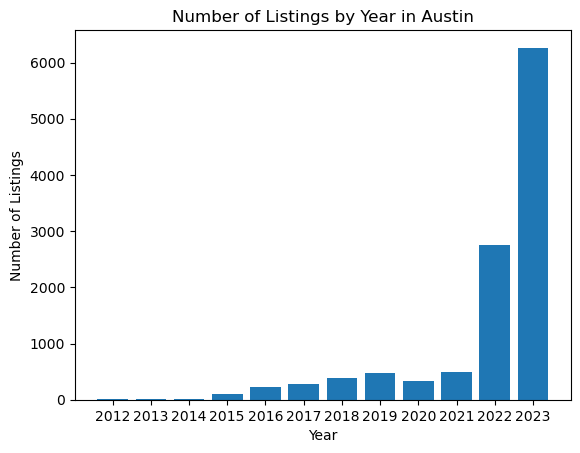

In [130]:
# Load the Austin listings dataset
listings = pd.read_csv('Austin_listings.csv')

# Convert the 'last_review' column to datetime format
listings['last_review'] = pd.to_datetime(listings['last_review'])

# Create a new column 'year_month'
listings['year_month'] = listings['last_review'].dt.strftime('%Y')

# Group the listings by year-month and count the number of listings
listings_by_month = listings.groupby('year_month')['id'].count()

# Create a line chart of the number of listings over time
plt.plot(listings_by_month.index, listings_by_month.values)
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Year in Austin')
plt.show()

# Create a bar chart of the number of listings over time
plt.bar(listings_by_month.index, listings_by_month.values)
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Year in Austin')
plt.show()


## d) BoxPlot:
   
* A box plot is a graphical representation of the distribution of numerical data based on five summary statistics: 
 * **Minimum value, the first quartile (Q1), the median, the third quartile (Q3), and the maximum value**
* In the context of the Austin listings dataset, a box plot can be used to visualize the distribution of a numerical variable across different groups or categories.

Box plot can be drawn using two packages
* matplotlib.pyplot
* seaborn

**Insights**
* A box plot can be used to compare the distribution of prices for different property types in Austin.
* The x-axis can represent the property types, while the y-axis represents the price.
* The box plot can show the range of prices for each property type, as well as any **outliers or unusual patterns** in the data.



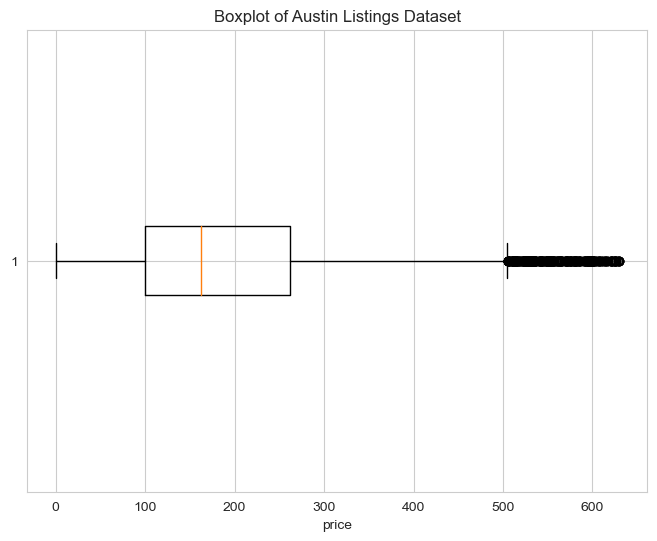

In [136]:
column_to_plot = 'price'

# Create the boxplot
fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(listing_data[column_to_plot], vert=False)

# Add labels and title
ax.set_xlabel(column_to_plot)
ax.set_title('Boxplot of Austin Listings Dataset')

# Show the plot
plt.show()

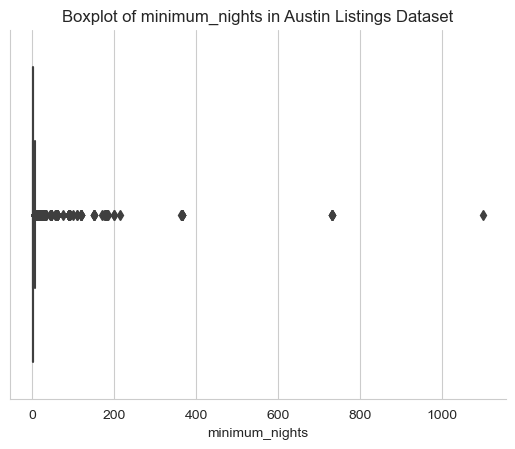

In [132]:

# Choose the column to create the boxplot for
column_to_plot = 'minimum_nights'

# Create the boxplot using Seaborn
sns.set_style('whitegrid')
ax = sns.boxplot(x=listing_data[column_to_plot])

# Set the title and axis labels
ax.set_title(f'Boxplot of {column_to_plot} in Austin Listings Dataset')
ax.set_xlabel(column_to_plot)

# Show the plot
sns.despine()
plt.show()

**PRICE BOXPLOT**
* In the case of the Austin listings dataset, the minimum nights variable does not have enough variability in the data to create a box. 
* This occur if the majority of listings have a minimum nights value that is close to the minimum or maximum value of the data. * In such cases, the box plot may show a line or dot instead of a box.

**MINIMUM NIGHTS BOXPLOT**
* On the other hand, the price variable has a wider range of values and more variability in the data, resulting in the creation of a box in the box plot. 
* The box plot can show the range of prices for each group or category, as well as any outliers or unusual patterns in the data.

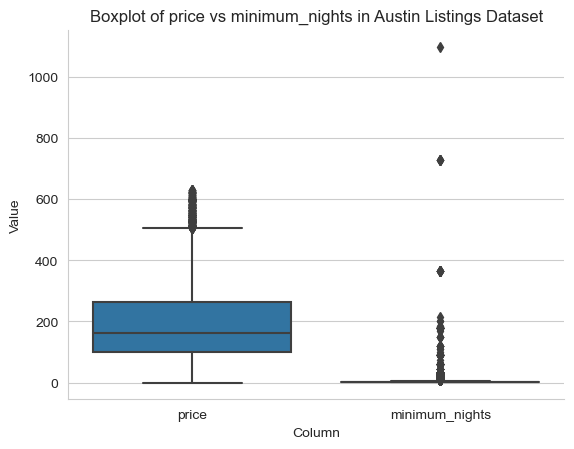

In [138]:

# Choose the columns to compare in the boxplot
column1_to_plot = 'price'
column2_to_plot = 'minimum_nights'

# Create the boxplot using Seaborn
sns.set_style('whitegrid')
ax = sns.boxplot(data=listing_data[[column1_to_plot, column2_to_plot]])

# Set the title and axis labels
ax.set_title(f'Boxplot of {column1_to_plot} vs {column2_to_plot} in Austin Listings Dataset')
ax.set_xlabel('Column')
ax.set_ylabel('Value')

# Show the plot
sns.despine()
plt.show()

## e) Scatter Plot:
       
* A scatter plot is a graphical representation of the relationship between two numerical variables.
* Each point on the scatter plot represents the value of the two variables for one observation. 
* The position of each dot on the horizontal and vertical axis indicates values for an individual data point.

**Insights**
* In our visualization we are taking number_of_reviews on X axis and reviews_per_month on Y axis.
* We can see that there are more dots between 0 to 400. This is representing that there are more reviews between 0 to 400.

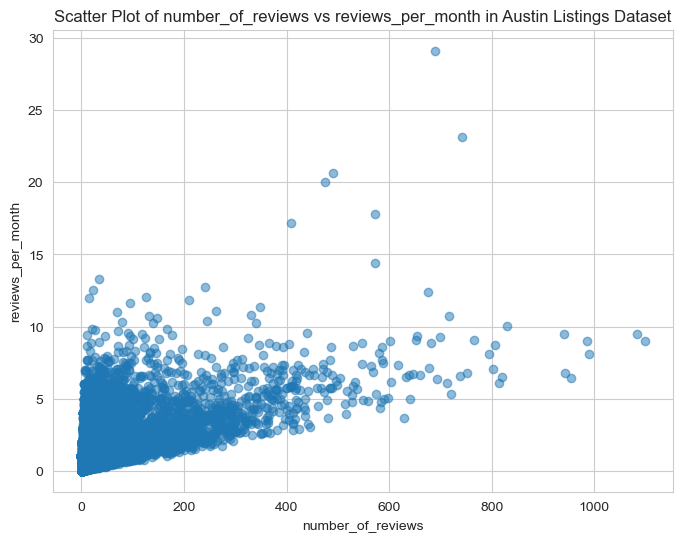

In [146]:
# Choose the columns to create the scatter plot for
x_column = 'number_of_reviews'
y_column = 'reviews_per_month'

# Create the scatter plot using Matplotlib
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(listing_data[x_column], listing_data[y_column], alpha=0.5)

# Set the title and axis labels
ax.set_title(f'Scatter Plot of {x_column} vs {y_column} in Austin Listings Dataset')
ax.set_xlabel(x_column)
ax.set_ylabel(y_column)

# Show the plot
plt.show()

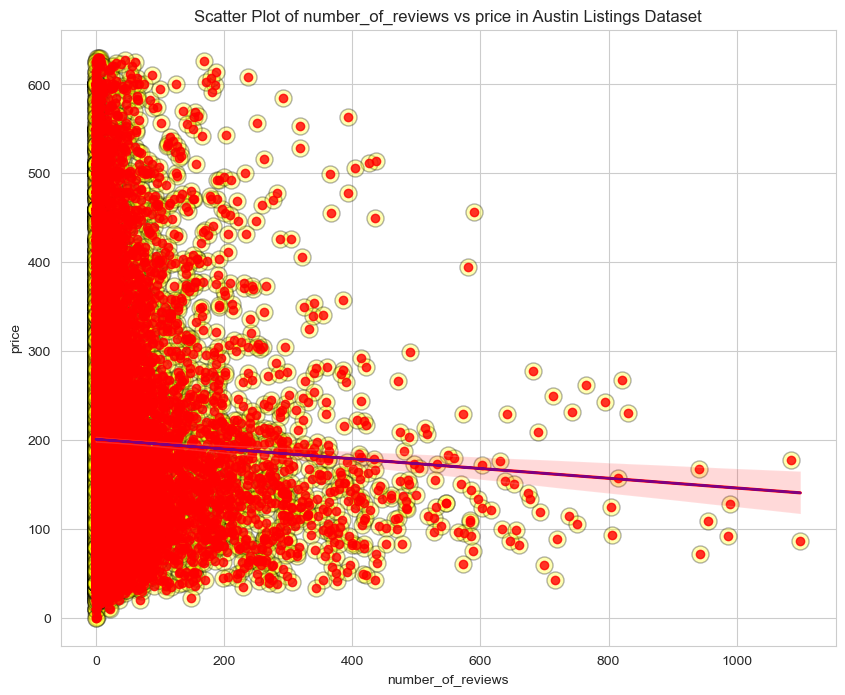

In [147]:
# Choose the columns to create the scatter plot for
x_column = 'number_of_reviews'
y_column = 'price'

x = listing_data[x_column]
y = listing_data[y_column]

# Create the scatter plot using Matplotlib
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y, linewidths=1, alpha=.3, edgecolor='k', s = 150, color = 'yellow')

m, b = np.polyfit(x, y, 1)
sns.regplot(listing_data[x_column], listing_data[y_column], color = 'red')
plt.plot(x, m*x+b, color = 'purple')

# Set the title and axis labels
ax.set_title(f'Scatter Plot of {x_column} vs {y_column} in Austin Listings Dataset')
ax.set_xlabel(x_column)
ax.set_ylabel(y_column)

# Show the plot
plt.show()

## f) Pie Chart:
       
* A pie chart is a circular graph that is divided into slices to represent the relative size or proportion of different categories in a dataset.
* Each slice of the pie chart represents a category, and the size of the slice is proportional to the percentage of observations that belong to that category.
* A pie chart can be used to show the distribution of listings across different categories, such as property types or neighborhoods. 

**Insights**

* Each slice of the pie chart represents a neighborhood, and the size of the slice represents the percentage of listings in that neighborhood that belong to each property type.

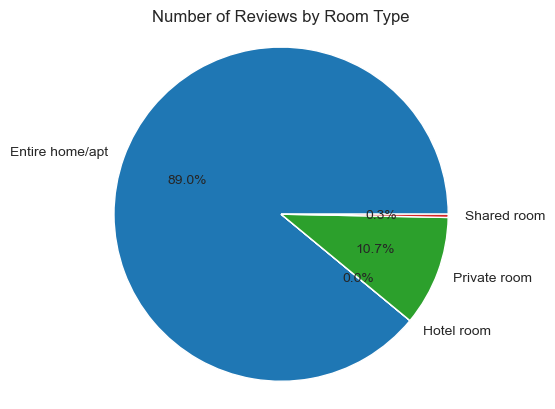

In [152]:
# group the data by room type and calculate the number of reviews for each
reviews_by_room_type = listing_data.groupby('room_type')['number_of_reviews'].sum()

# create a pie chart with the reviews by room type
plt.pie(reviews_by_room_type, labels=reviews_by_room_type.index, autopct='%1.1f%%')
plt.title('Number of Reviews by Room Type')
plt.axis('equal')
plt.show()

## g) Heat Map:

* A heat map is a graphical representation of data that uses color-coding to indicate the magnitude of a variable across different categories.
* In the context of the Austin Listings dataset, a heat map can be used to show the distribution of a certain variable (such as price or number of reviews) across different neighborhoods in Austin.
* By using color-coding, heat maps can quickly highlight areas with high or low values of a variable, making it easier to identify clusters or trends.

**We are using a correlation matrix for this heat map**
* Correlation matrix is a mixture of Categorical and Numerical variables.
* The matrix is a collection of room_type, availability_365, price, number_of_reviews, reviews_per_month variables.
* With the help of this correlation matrix we can compare within these variables and distinguish with colors.
* Positive and Negative values shows the increasing and decreasing ranges.

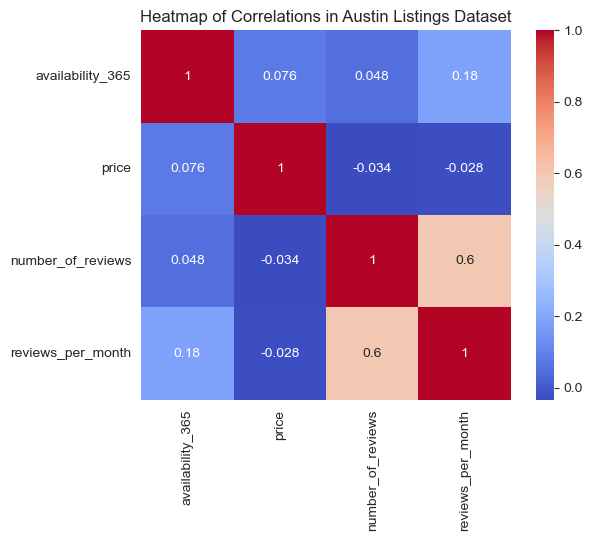

In [ ]:
# Choose the columns to create the heatmap for
heatmap_columns = ['room_type', 'availability_365', 'price', 'number_of_reviews', 'reviews_per_month']

# Create the correlation matrix
corr_matrix = listing_data[heatmap_columns].corr()

# Create the heatmap using Seaborn
sns.set_style('white')
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, square=True)

# Set the title
plt.title('Heatmap of Correlations in Austin Listings Dataset')

# Show the plot
plt.show()
#In this example, we're creating a heatmap for the 'room_type', 'availability_365', 'price', 'number_of_reviews', and 'review_scores_rating' columns in the Austin listings dataset. The corr





**The following HeatMap uses the pivot table concpet**
* The pivot table takes in the values as a variable and index as another variable
* It also takes a function to be performed between the variables say mean.
* The output is a heatmap with different color codes displaying which neighborhood listing had what price range

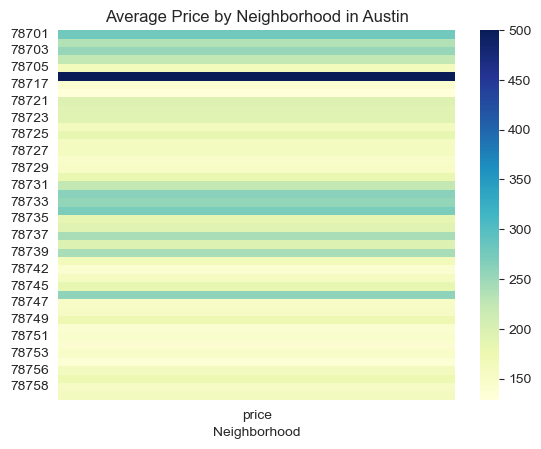

In [160]:
# create a pivot table to calculate the mean price for each neighborhood
price_by_neighborhood = listing_data.pivot_table(values='price', index='neighborhood', aggfunc='mean')

# create the heat map using seaborn
sns.heatmap(price_by_neighborhood, cmap='YlGnBu')

# add title and axis labels
plt.title('Average Price by Neighborhood in Austin')
plt.xlabel('Neighborhood')
plt.ylabel('')

# display the chart
plt.show()


**A HeatMap with the geoJson format can be acheived using various packages such as:**
* Folium
* figure_factory
* chloropleuth

**The following HeatMap uses the plotly.figure_factory package**
* It takes the latitude and longitude data given in the Ausitn_listings dataset and creates a map of the listings.
* This map resembles the Austin state and can show at what range of latitudes how many listings are present.

In [202]:
# Load the Austin listing dataset
df = listing_data

# Define the bins for the heat map
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Create the heat map
fig = ff.create_2d_density(
    x=df['longitude'], y=df['latitude'], 
    colorscale='Earth', 
    hist_color='rgba(0, 0, 0, 0.1)', 
    ncontours=20
)

# Update the layout
fig.update_layout(
    title='Heatmap of Austin Listings',
    xaxis_title='Longitude',
    yaxis_title='Latitude'
)

# Show the figure
fig.show()

# Merging of datasets

* Merging of sub datasets is also important for a better visualization.
* Here we have a dataset **neighbourhoods.csv** which has additional data for the listings
* The Austin_Listings dataset and the neighbourhoods dataset have neighborhood as a common columns which can be merged as an OUTER JOIN.
* Graphs can be then drawn while comparing columns between both the datasets


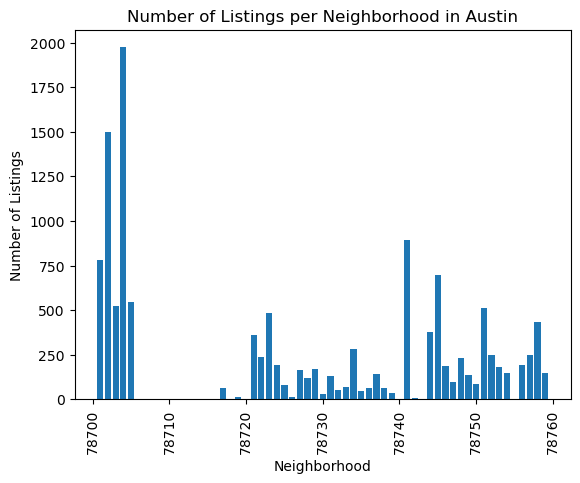

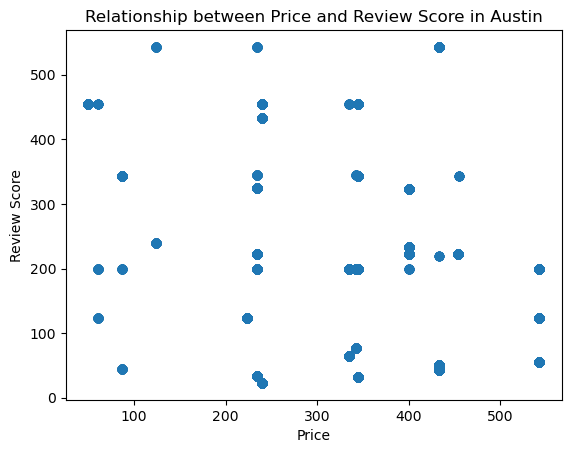

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load neighborhood data
neighborhoods = pd.read_csv('neighbourhoods.csv')

# Load listings data
listings = listing_data

# Merge the two datasets on the neighborhood ID
merged = pd.merge(listings, neighborhoods, on='neighborhood')

# Count the number of listings per neighborhood
listings_per_neighborhood = merged['neighborhood'].value_counts()

# Create a bar chart of the number of listings per neighborhood
plt.bar(listings_per_neighborhood.index, listings_per_neighborhood.values)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.title('Number of Listings per Neighborhood in Austin')
plt.show()

# Create a scatter plot of the relationship between price and review score
plt.scatter(merged['neighborhood_price'], merged['neighborhood_number_of_reviews'])
plt.xlabel('Price')
plt.ylabel('Review Score')
plt.title('Relationship between Price and Review Score in Austin')
plt.show()